In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report
plt.style.use('seaborn')

In [7]:
d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Theft/CDI_Based/Intensity/CSV/Optical_Mag.csv',index_col=0)
d.Class[d['Class']==1] = -1
d.Class[d['Class'] == 0] = 1
display(d.head())

<ipython-input-7-b7f3764a6b2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class']==1] = -1
<ipython-input-7-b7f3764a6b2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Class[d['Class'] == 0] = 1


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,Class
0,586.76105,570.88837,629.165200,746.37870,466.95877,649.67650,402.60876,516.51040,609.10840,368.98330,...,247.69357,227.145510,218.513820,230.525900,1273.88810,514.76480,413.46637,512.99720,796.40045,1
1,1487.08200,1482.38800,1221.876500,1487.72390,1682.68050,1135.69380,969.54770,1131.09940,1065.94470,1057.59640,...,820.69340,1010.535770,1073.447300,1230.768200,1961.50560,925.31274,855.35930,1132.36540,919.54300,1
2,3997.08640,4725.29440,2437.333000,2418.62100,2322.39800,2069.42750,2468.61330,1780.41320,1530.24220,1308.26530,...,1101.30200,1289.206000,1427.282000,1021.977050,1281.87680,904.46893,667.50560,561.97450,860.41034,1
3,627.12085,236.43054,233.085770,587.63470,345.72708,296.34213,574.97205,246.12138,194.81125,632.93740,...,578.80237,151.095630,160.488170,541.474060,1093.96780,182.53750,469.53372,203.77255,296.88330,1
4,219.91739,146.82297,110.280876,179.04475,194.71243,153.23369,198.42319,133.17293,148.48108,149.94809,...,95.28019,75.054344,70.148544,106.647766,851.65466,100.52083,99.84924,131.67190,81.38464,1


In [8]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)

std =StandardScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)


In [9]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.8618421052631579
              precision    recall  f1-score   support

          -1       0.88      0.97      0.92       123
           1       0.75      0.41      0.53        29

    accuracy                           0.86       152
   macro avg       0.81      0.69      0.73       152
weighted avg       0.85      0.86      0.85       152



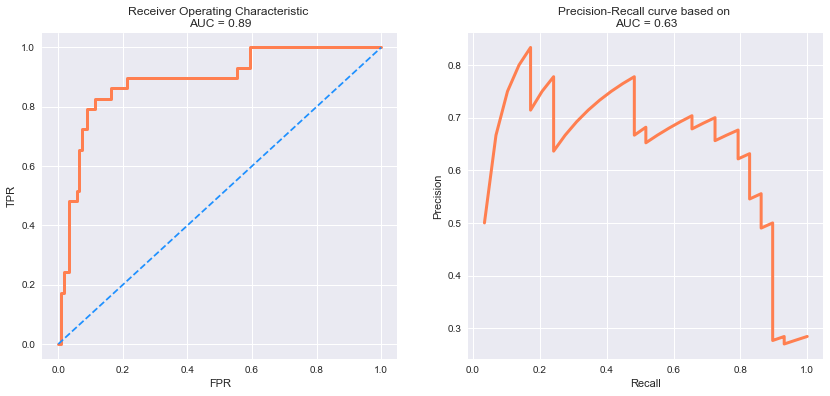

In [10]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()